In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
from datasets import load_dataset

# Load data(data transform to parquet for upload on the github)
# tracks_df = pd.read_csv('./data/tracks.csv')
# artists_df = pd.read_csv('./data/artists.csv')
# tracks_data = load_dataset(data_files = "tracks.csv", path = "./data", split = "train")
# artists_data = load_dataset(data_files = "artists.csv", path = "./data", split = "train")
# tracks_data.to_parquet("./data/tracks.parquet")
# artists_data.to_parquet("./data/artists.parquet")

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

83619231

In [30]:

tracks_data = load_dataset(data_files = "tracks.parquet", path = "./data", split = "train")
artists_data = load_dataset(data_files = "artists.parquet", path = "./data", split = "train")

tracks_df = tracks_data.to_pandas()
artists_df = artists_data.to_pandas()
len(tracks_df), len(artists_df)

(586672, 1162095)

In [31]:
tracks_df.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.6,0.4,0,-13.3,1,0.5,0.7,0.7,0.2,0.1,104.9,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.7,0.3,0,-22.1,1,1.0,0.8,0.0,0.1,0.7,102.0,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.4,0.2,1,-21.2,1,0.1,1.0,0.0,0.2,0.5,130.4,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.3,0.1,7,-28.0,1,0.1,1.0,0.9,0.1,0.4,170.0,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.4,0.2,3,-16.9,0,0.0,1.0,0.1,0.3,0.2,103.2,4


In [32]:
artists_df.head(5)

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


## Task1: Clean the tracks data
- Handling missing values: You can fill missing values or use other methods.
- Removing duplicates: Feature "id".
- Converting data type: Convert "release_date" to datetime.
- Converting data unit: Convert "duration" from ms to minutes.
- Creating derived features: Create "year" and "month" features.


## 任务 1：清理轨迹数据
- 处理缺失值：您可以填充缺失值或使用其他方法。
- 删除重复项：特征“id”。
- 转换数据类型：将“release_date”转换为日期时间。
- 转换数据单位：将“duration”从毫秒转换为分钟。
- 创建派生特征：创建“year”和“month”特征。

In [33]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [34]:
tracks_df["id"].value_counts()

id
35iwgR4jXetI318WEWsa1Q    1
6cHlho8Qe04uAIa1hd6efJ    1
1AL2EDY1U2dLL0WqQGtNu0    1
4vsj6KApKrZnQnF76Zve2u    1
5D0srsR8tggP6mLAdBn8d9    1
                         ..
2LQ4m8ippuDqoUp1xBNEhh    1
0AXvsASR6KBRuiVpO5YLYf    1
0Bmbax5v1Vn8HTxbeW1Uaf    1
2Chd3LE68nQnVjPOfreCuN    1
5Ocn6dZ3BJFPWh4ylwFXtn    1
Name: count, Length: 586672, dtype: int64

In [35]:
# 1. Handling missing values: Rows containing the deletion of missing values
tracks_df = tracks_df.dropna()

# 2. Remove duplicates: Remove duplicates based on the 'id' column
tracks_df = tracks_df.drop_duplicates(subset=['id'])

# 3. Converting data type(1922 -> 1922-01-01)
tracks_df['release_date'] = pd.to_datetime(tracks_df['release_date'], format = 'mixed')

# 4. Converting data unit: Convert "duration" from ms to minutes.
tracks_df['duration_min'] = round(tracks_df['duration_ms'] / 60000, 2)

# 5. Creating derived features: Create "year" and "month" features.
tracks_df['year'] = tracks_df['release_date'].dt.year
tracks_df['decade'] = tracks_df['release_date'].dt.year // 10 * 10
tracks_df['month'] = tracks_df['release_date'].dt.month

print(tracks_df.info())
print(tracks_df[['duration_min', 'year', 'month']].head())
print(len(tracks_df))
tracks_df.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 586601 entries, 0 to 586671
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586601 non-null  object        
 1   name              586601 non-null  object        
 2   popularity        586601 non-null  int64         
 3   duration_ms       586601 non-null  int64         
 4   explicit          586601 non-null  int64         
 5   artists           586601 non-null  object        
 6   id_artists        586601 non-null  object        
 7   release_date      586601 non-null  datetime64[ns]
 8   danceability      586601 non-null  float64       
 9   energy            586601 non-null  float64       
 10  key               586601 non-null  int64         
 11  loudness          586601 non-null  float64       
 12  mode              586601 non-null  int64         
 13  speechiness       586601 non-null  float64       
 14  acousticn

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,year,decade,month
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.6,0.4,...,0.7,0.7,0.2,0.1,104.9,3,2.1,1922,1920,2
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.7,0.3,...,0.8,0.0,0.1,0.7,102.0,1,1.6,1922,1920,6
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.4,0.2,...,1.0,0.0,0.2,0.5,130.4,5,3.0,1922,1920,3
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.3,0.1,...,1.0,0.9,0.1,0.4,170.0,3,3.0,1922,1920,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.4,0.2,...,1.0,0.1,0.3,0.2,103.2,4,2.7,1922,1920,1


## Task2: Find artist names that don't contain collaborations
- Should match: "Ed Sheeran", "Taylor Swift"
- Should not match: "Ed Sheeran feat. Taylor Swift", "BTS & Coldplay"

## 任务2：找出不包含合作艺人名称的艺人
- 应匹配：“Ed Sheeran”、“Taylor Swift”
- 不应匹配：“Ed Sheeran feat. Taylor Swift”、“BTS & Coldplay”

In [36]:
def find_solo_artists(artist_name):
    """
    Task: Find artist names that don't contain collaborations
    - Should match: "Ed Sheeran", "Taylor Swift"
    - Should not match: "Ed Sheeran feat. Taylor Swift", "BTS & Coldplay"
    """
    pattern = r'(feat\.| & | and |, )'
    match = re.search(pattern, str(artist_name))
    return not bool(match)

# Test the function
test_artists = [
    "Ed Sheeran",
    "Taylor Swift",
    "Ed Sheeran feat. Taylor Swift",
    "BTS & Coldplay"
]

for artist in test_artists:
    result = find_solo_artists(artist)
    print(f"{artist}: {result}")

Ed Sheeran: True
Taylor Swift: True
Ed Sheeran feat. Taylor Swift: False
BTS & Coldplay: False


In [37]:
solo_artists_df = tracks_df[tracks_df['artists'].apply(find_solo_artists)]
print("artist names that don't contain collaborations:",len(solo_artists_df))
solo_artists_df.head(5)

artist names that don't contain collaborations: 464404


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,year,decade,month
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.6,0.4,...,0.7,0.7,0.2,0.1,104.9,3,2.1,1922,1920,2
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.7,0.3,...,0.8,0.0,0.1,0.7,102.0,1,1.6,1922,1920,6
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.4,0.2,...,1.0,0.0,0.2,0.5,130.4,5,3.0,1922,1920,3
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.3,0.1,...,1.0,0.9,0.1,0.4,170.0,3,3.0,1922,1920,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.4,0.2,...,1.0,0.1,0.3,0.2,103.2,4,2.7,1922,1920,1


## Task3:  Extract featured artists from track names
Example:
- Input: "Love Yourself (feat. Justin Bieber)"
- Output: "Justin Bieber"

## 任务3：从歌曲名称中提取演唱者
示例：
- 输入：“Love Yourself (feat. Justin Bieber)”
- 输出：“Justin Bieber”


In [38]:
def extract_featured_artists(track_name):
    """
    Task: Extract featured artists from track names
    - Input: "Love Yourself (feat. Justin Bieber)"
    - Output: "Justin Bieber"
    """
    pattern = r'(?:feat\.|ft\.|featuring)\s+([^)]+)'
    match = re.search(pattern, track_name)
    return match.group(1).strip() if match else None

test_tracks = [
    "Love Yourself (feat. Justin Bieber)",
    "Stay With Me ft. Sam Smith",
    "No Featured Artist",
    "Perfect (featuring Ed Sheeran)"
]

# test
for track in test_tracks:
    featured_artist = extract_featured_artists(track)
    print(f"Track: {track}, Featured Artist: {featured_artist}")

Track: Love Yourself (feat. Justin Bieber), Featured Artist: Justin Bieber
Track: Stay With Me ft. Sam Smith, Featured Artist: Sam Smith
Track: No Featured Artist, Featured Artist: None
Track: Perfect (featuring Ed Sheeran), Featured Artist: Ed Sheeran


In [39]:
featured_artist = tracks_df['name'].apply(extract_featured_artists).dropna()
len(featured_artist), len(tracks_df)

(7737, 586601)

In [40]:
featured_artist.head(5)

1241                         Jimmy Dorsey
2863                      Bix Beiderbecke
2865    Bix Beiderbecke & Frank Trumbauer
2867                      Bix Beiderbecke
2871         Bix Beiderbecke & Eddie Lang
Name: name, dtype: object

## Task4: Create new features
- Duration categories: 'Very Short', 'Short', 'Medium', 'Long', 'Very Long' (Feature "duration_min")
- Popularity level: 'Very Low', 'Low', 'Medium','High', 'Very High' (Feature "popularity")
- Audio feature combinations: Energy_dance_ratio = energy / danceability (Feature "energy" and "danceability")

## 任务4：创建新特征
- 时长类别：'非常短'、'短'、'中等'、'长'、'非常长'（特征“duration_min”）
- 流行度等级：'非常低'、'低'、'中等'、'高'、'非常高'（特征“popularity”）
- 音频特征组合：Energy_dance_ratio = energy / danceability（特征“energy”和“danceability”）

In [41]:
new_df = tracks_df.copy()
# filtered
numeric_columns = new_df.select_dtypes(include='number').columns
print(numeric_columns)
selected_columns = ['duration_min', 'popularity', 'energy', 'danceability']
filtered_columns = [col for col in selected_columns if col in numeric_columns]

pd.set_option('display.float_format', lambda x: '%.1f' % x)

# calculation
min_values = new_df[filtered_columns].min()
max_values = new_df[filtered_columns].max()
ranges = max_values - min_values

# output
result = pd.DataFrame({
    'minimum': min_values,
    'maximum': max_values,
    'range': ranges
})

print(result)

bins = [0, 20, 40, 60, 80, 100]
time_labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
test = [0, 20, 39, 59, 79, 99, 100]
res = pd.cut(test, bins=bins, labels=time_labels, right=False)
print(res)

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'duration_min', 'year', 'decade', 'month'],
      dtype='object')
              minimum  maximum  range
duration_min      0.1     93.7   93.6
popularity        0.0    100.0  100.0
energy            0.0      1.0    1.0
danceability      0.0      1.0    1.0
['Very Short', 'Short', 'Short', 'Medium', 'Long', 'Very Long', NaN]
Categories (5, object): ['Very Short' < 'Short' < 'Medium' < 'Long' < 'Very Long']


In [42]:
def create_features(df):
    """
    Task: Create new features:
    1. Duration categories
    2. Popularity bins
    3. Audio feature combinations
    4. Text-based features
    """
    #duration_category:'Very Short', 'Short', 'Medium', 'Long', 'Very Long'
    #popularity_level:'Very Low', 'Low', 'Medium','High', 'Very High'
    #energy_dance_ratio:energy / danceability

    # 1. Duration categories
    bins = [0, 20, 40, 60, 80, 100]
    time_labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
    df['duration_category'] = pd.cut(df['duration_min'], bins=bins, labels=time_labels, right=False)

    # 2. Popularity bins
    popularity_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
    df['popularity_level'] = pd.cut(df['popularity'], bins=bins, labels=popularity_labels, right=False)

    # 3. Audio feature combinations
    df['energy_dance_ratio'] = df['energy'] / df['danceability']
    return df

cleaned_tracks = create_features(tracks_df)
cleaned_tracks['danceability'].min()

0.0

In [43]:
cleaned_tracks.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,valence,tempo,time_signature,duration_min,year,decade,month,duration_category,popularity_level,energy_dance_ratio
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.6,0.4,...,0.1,104.9,3,2.1,1922,1920,2,Very Short,Very Low,0.7
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.7,0.3,...,0.7,102.0,1,1.6,1922,1920,6,Very Short,Very Low,0.4
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.4,0.2,...,0.5,130.4,5,3.0,1922,1920,3,Very Short,Very Low,0.4
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.3,0.1,...,0.4,170.0,3,3.0,1922,1920,3,Very Short,Very Low,0.3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.4,0.2,...,0.2,103.2,4,2.7,1922,1920,1,Very Short,Very Low,0.4


## Task5: Create time-based visualizations
- Feature trends over decades
- Seasonal patterns
- Evolution of audio features

## 任务5：创建基于时间的可视化图表
- 数十年的功能趋势
- 季节性模式
- 音频功能的演变

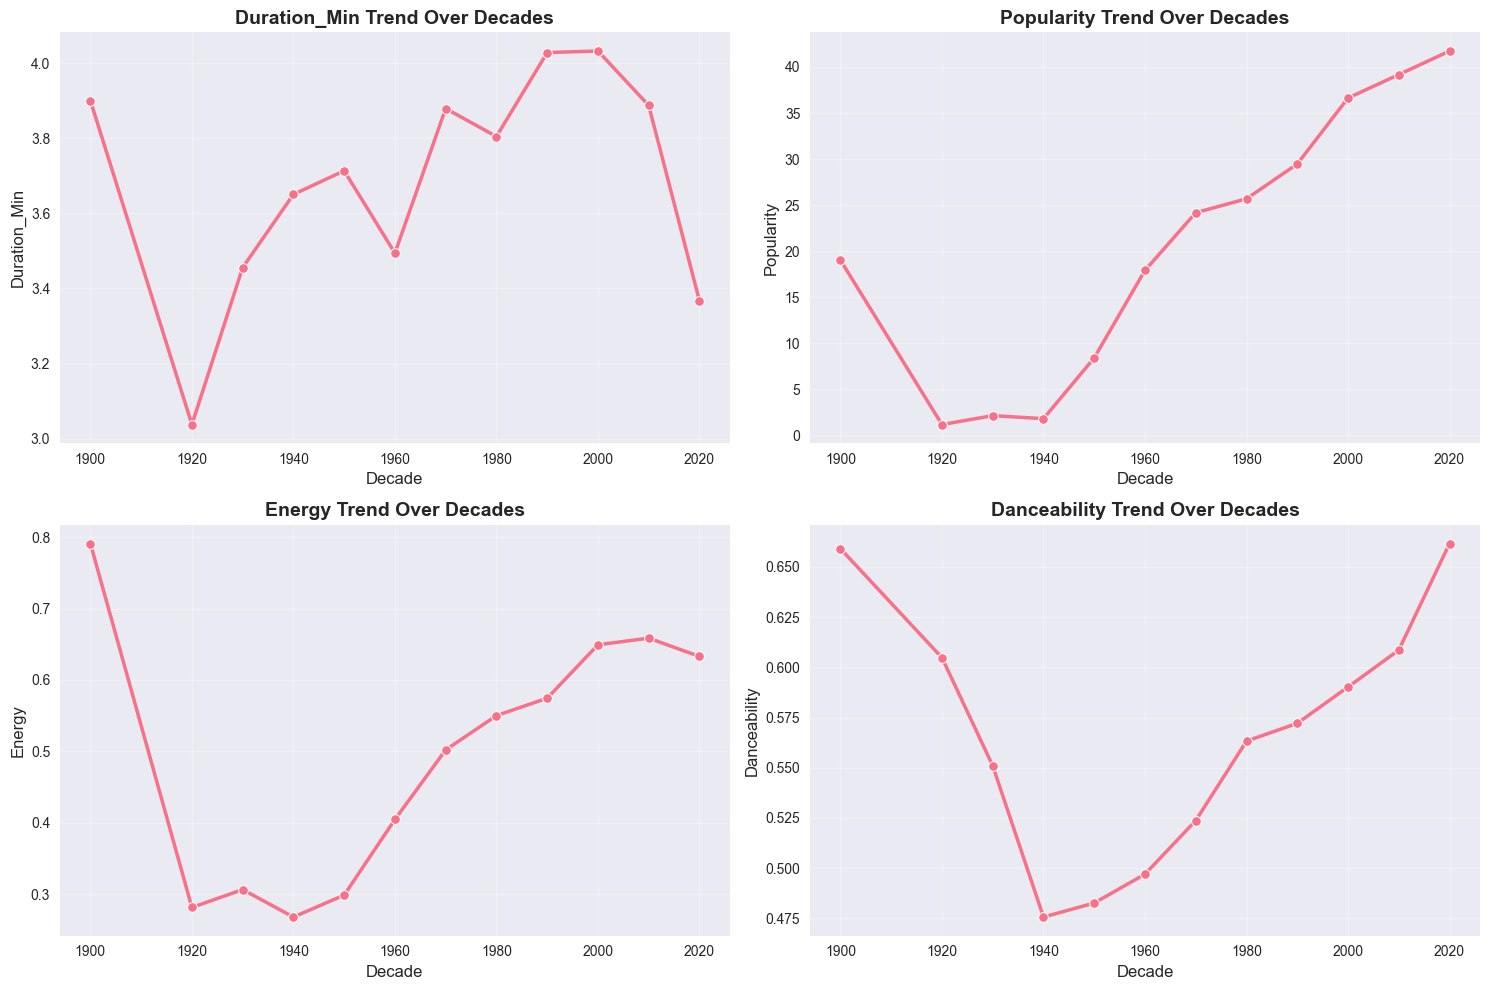

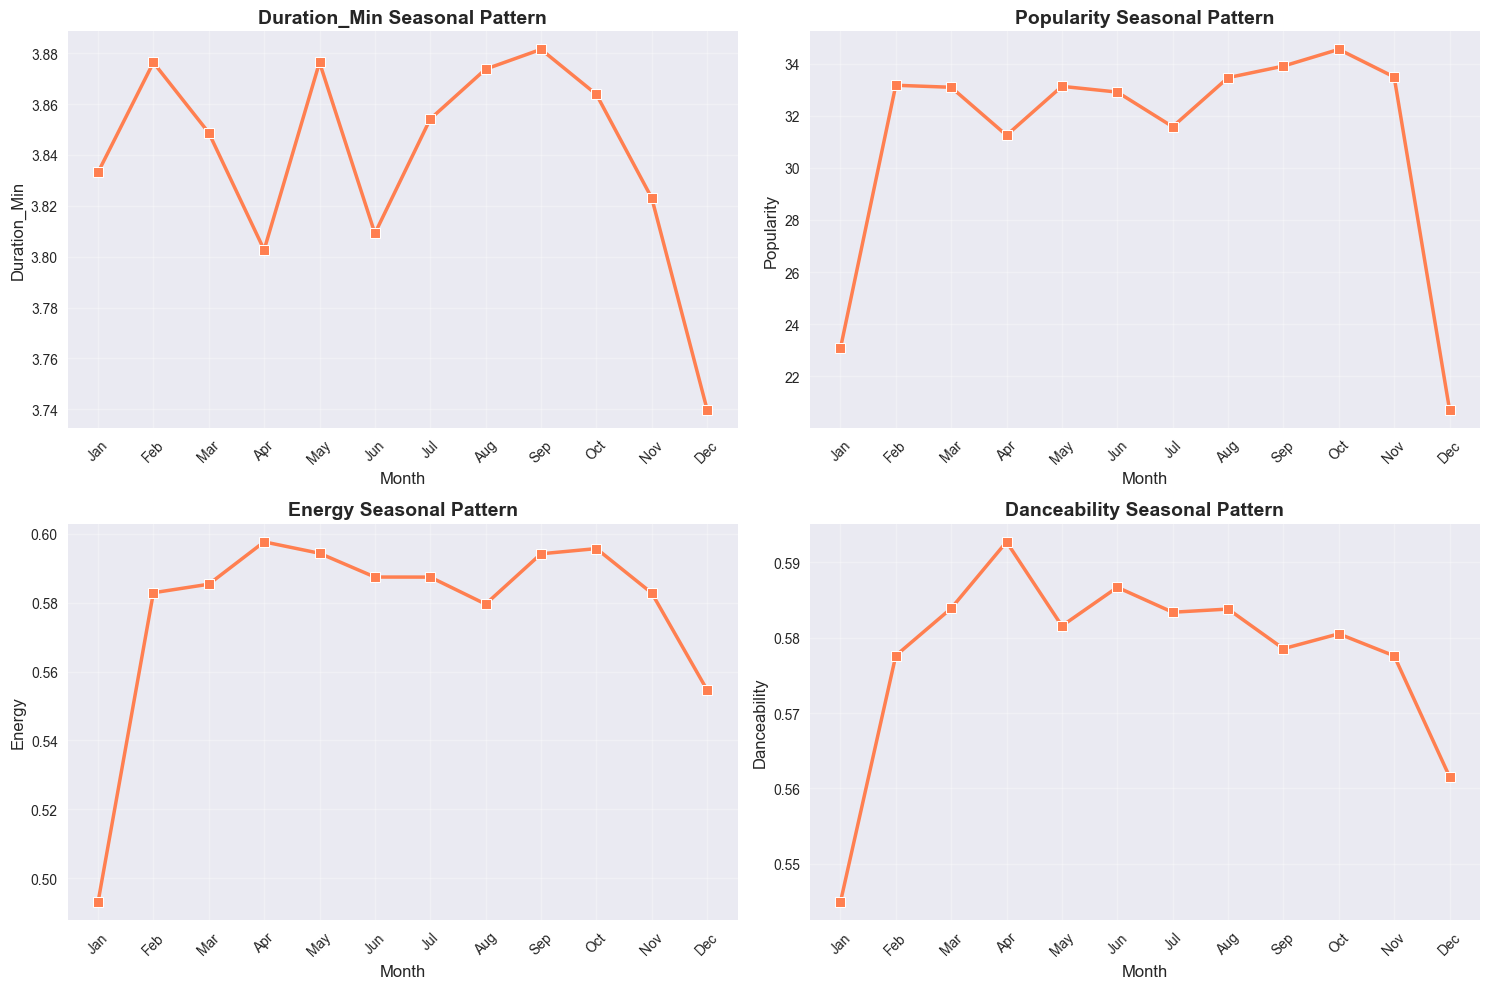

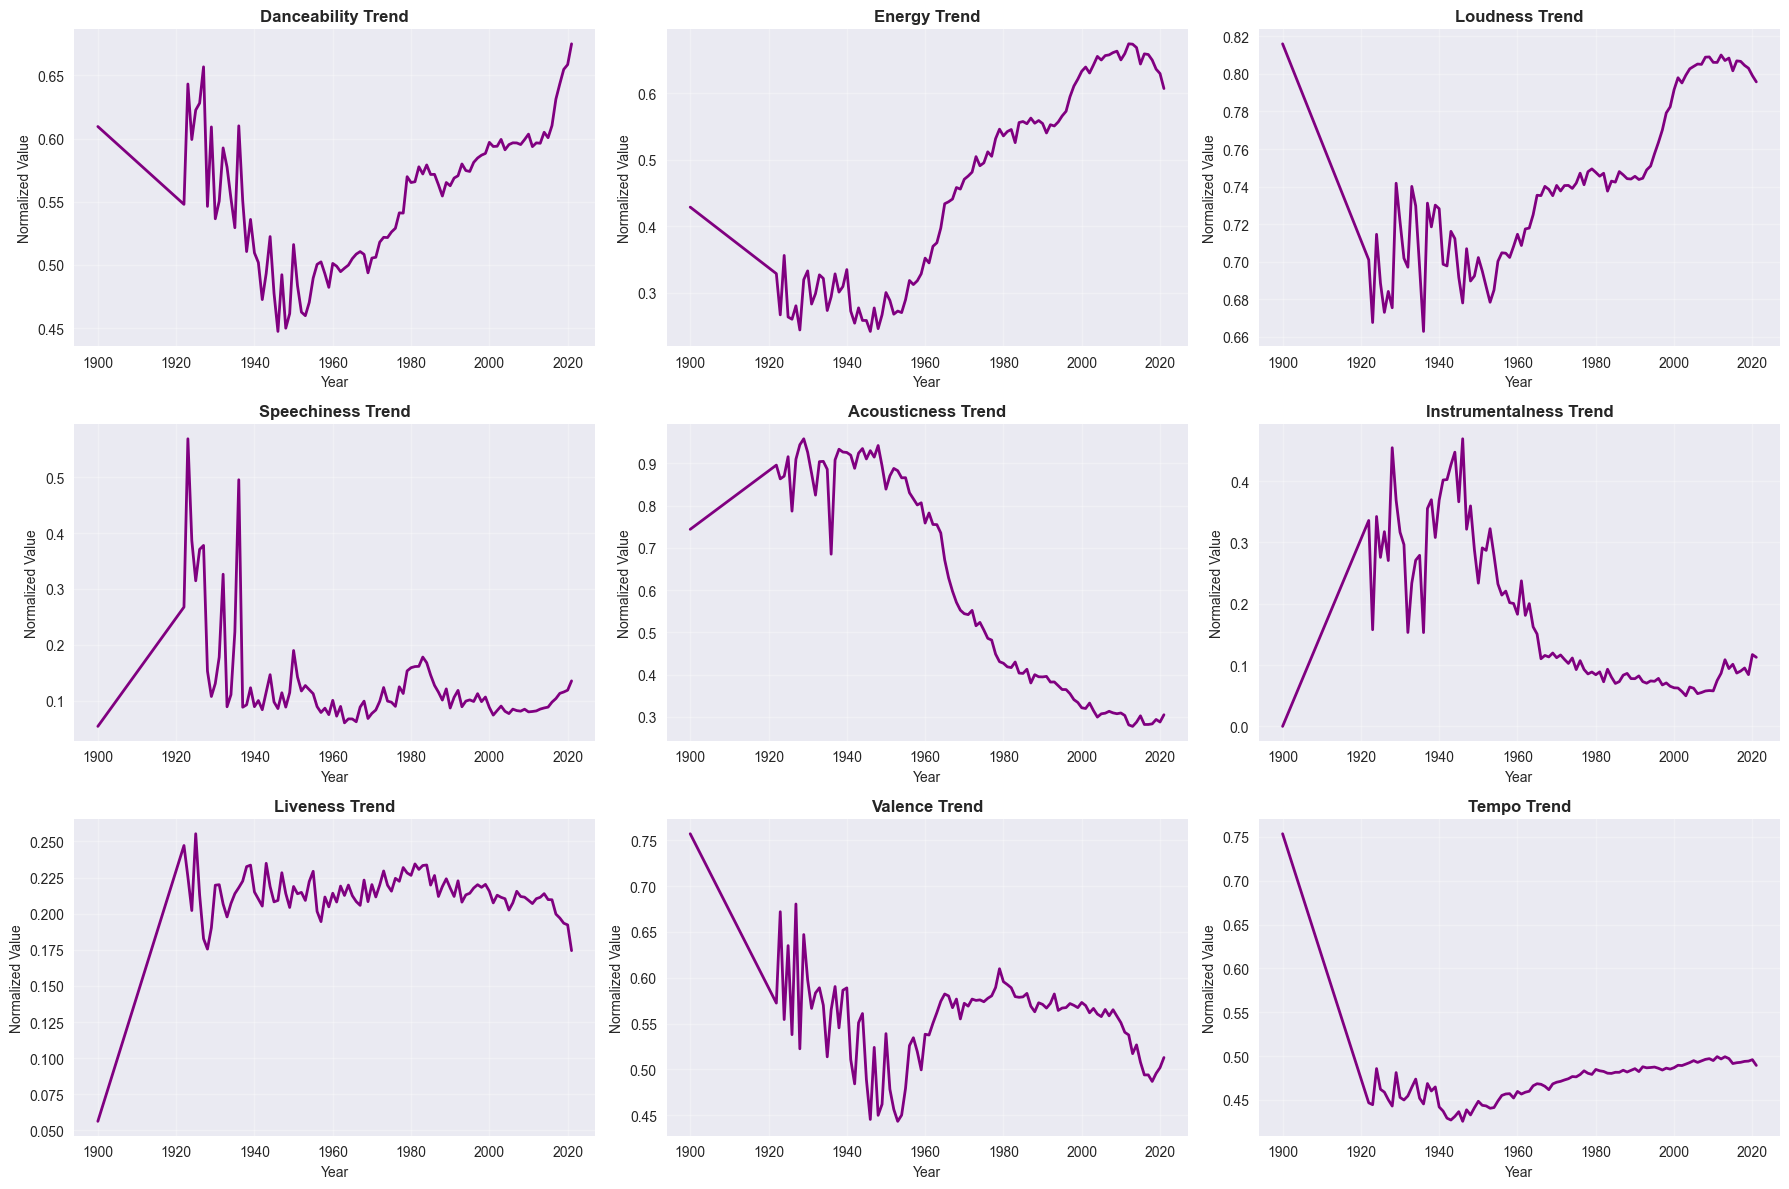

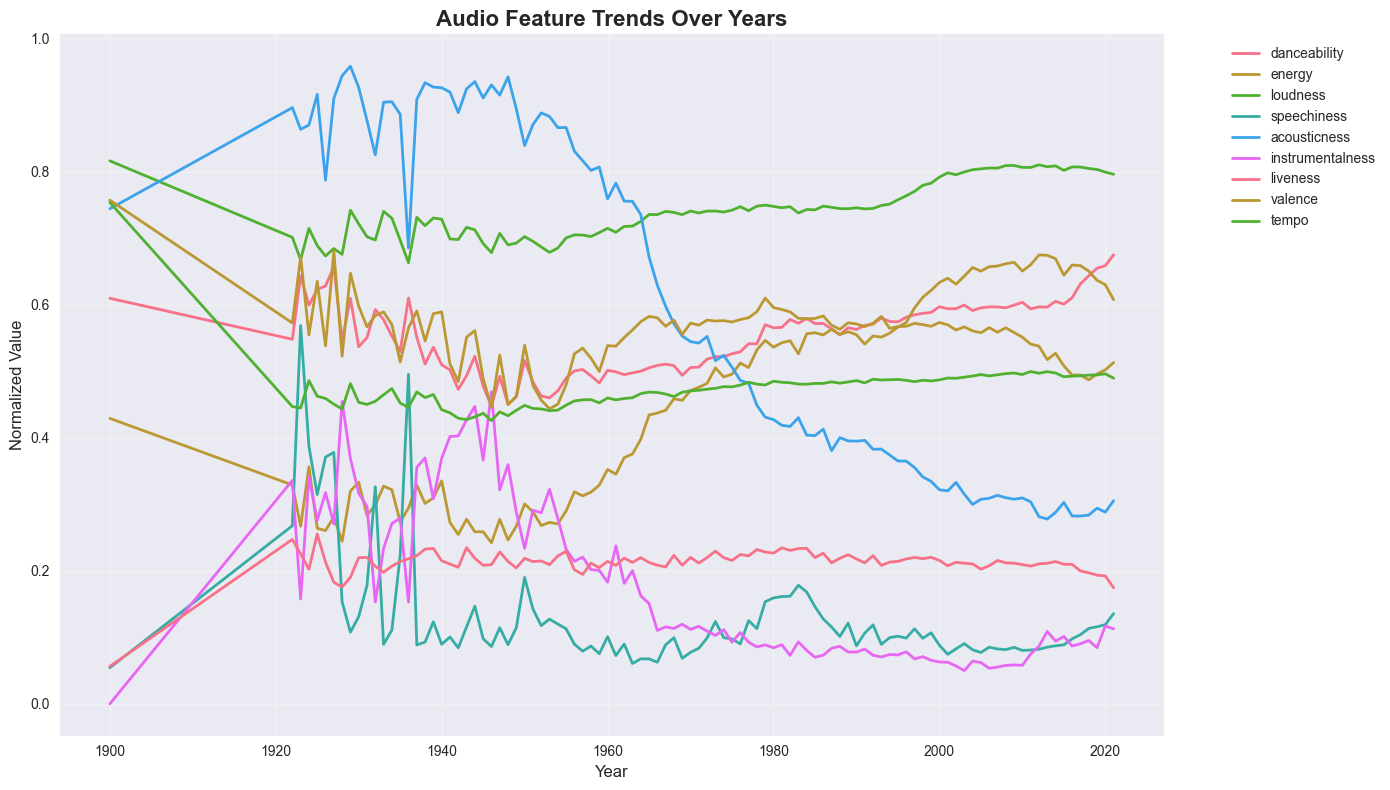

In [44]:
from sklearn.preprocessing import MinMaxScaler
def plot_temporal_trends(df):
    """
    Task: Create time-based visualizations:
    1. Feature trends over decades
    2. Seasonal patterns
    3. Evolution of audio features
    """
    plt.style.use('seaborn-v0_8')
    sns.set_palette("husl")

    features = ['duration_min', 'popularity', 'energy', 'danceability']

    # 1. Feature trends over decades
    fig1, axes1 = plt.subplots(2, 2, figsize=(15, 10))
    axes1 = axes1.ravel()

    for i, feature in enumerate(features):
        decade_trend = df.groupby('decade')[feature].mean()
        sns.lineplot(x=decade_trend.index, y=decade_trend.values,
                     marker='o', linewidth=2.5, ax=axes1[i])
        axes1[i].set_title(f'{feature.title()} Trend Over Decades', fontsize=14, fontweight='bold')
        axes1[i].set_xlabel('Decade', fontsize=12)
        axes1[i].set_ylabel(feature.title(), fontsize=12)
        axes1[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 2. Seasonal patterns
    fig2, axes2 = plt.subplots(2, 2, figsize=(15, 10))
    axes2 = axes2.ravel()

    for i, feature in enumerate(features):
        seasonal_pattern = df.groupby('month')[feature].mean()
        months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

        sns.lineplot(x=seasonal_pattern.index, y=seasonal_pattern.values,
                     marker='s', color='coral', linewidth=2.5, ax=axes2[i])
        axes2[i].set_title(f'{feature.title()} Seasonal Pattern', fontsize=14, fontweight='bold')
        axes2[i].set_xlabel('Month', fontsize=12)
        axes2[i].set_ylabel(feature.title(), fontsize=12)
        axes2[i].set_xticks(range(1, 13))
        axes2[i].set_xticklabels(months, rotation=45)
        axes2[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 3. Audio feature evolution
    audio_features = ['danceability', 'energy', 'loudness', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(df[audio_features])
    normalized_df = pd.DataFrame(normalized_data, columns=audio_features)
    normalized_df['year'] = df['year']

    yearly_trends = normalized_df.groupby('year')[audio_features].mean()

    # 创建子图
    fig3, axes3 = plt.subplots(3, 3, figsize=(18, 12))
    axes3 = axes3.ravel()

    for i, feature in enumerate(audio_features):
        sns.lineplot(x=yearly_trends.index, y=yearly_trends[feature],
                    ax=axes3[i], color='purple', linewidth=2)
        axes3[i].set_title(f'{feature.title()} Trend', fontsize=12, fontweight='bold')
        axes3[i].set_xlabel('Year', fontsize=10)
        axes3[i].set_ylabel('Normalized Value', fontsize=10)
        axes3[i].grid(True, alpha=0.3)

    # 隐藏多余的子图
    for i in range(len(audio_features), len(axes3)):
        axes3[i].set_visible(False)

    plt.tight_layout()
    plt.show()

    fig4, ax4 = plt.subplots(figsize=(14, 8))

    for feature in audio_features:
        sns.lineplot(x=yearly_trends.index, y=yearly_trends[feature],
                    label=feature, linewidth=2, ax=ax4)

    ax4.set_title('Audio Feature Trends Over Years', fontsize=16, fontweight='bold')
    ax4.set_xlabel('Year', fontsize=12)
    ax4.set_ylabel('Normalized Value', fontsize=12)
    ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_temporal_trends(cleaned_tracks)

## Task6: Create distribution visualizations
- Multiple feature distributions: Feature "popularity", "danceability", "energy" and "valence".
- Popularity distribution by category
- Audio feature relationships

## 任务6：创建分布可视化
- 多个特征分布：特征“流行度”、“舞曲性”、“能量”和“情感值”。
- 按类别划分的流行度分布
- 音频特征关系


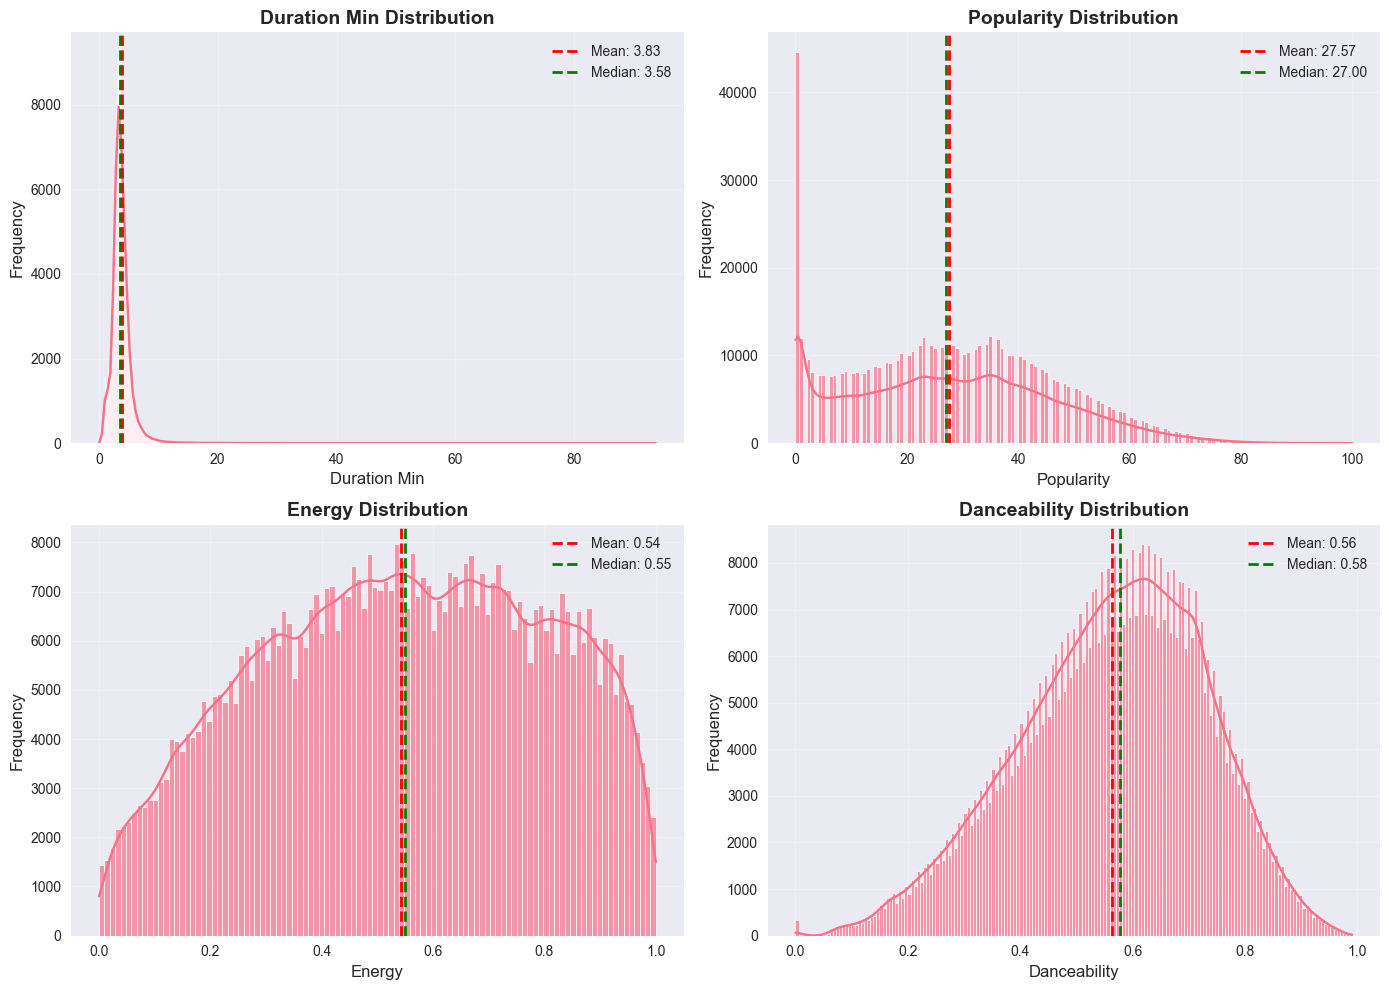

/var/folders/q_/8yf60dmj12zb6s7t_hk0t7y40000gn/T/ipykernel_78868/385561448.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=value_counts.index.astype(str), y=value_counts.values,


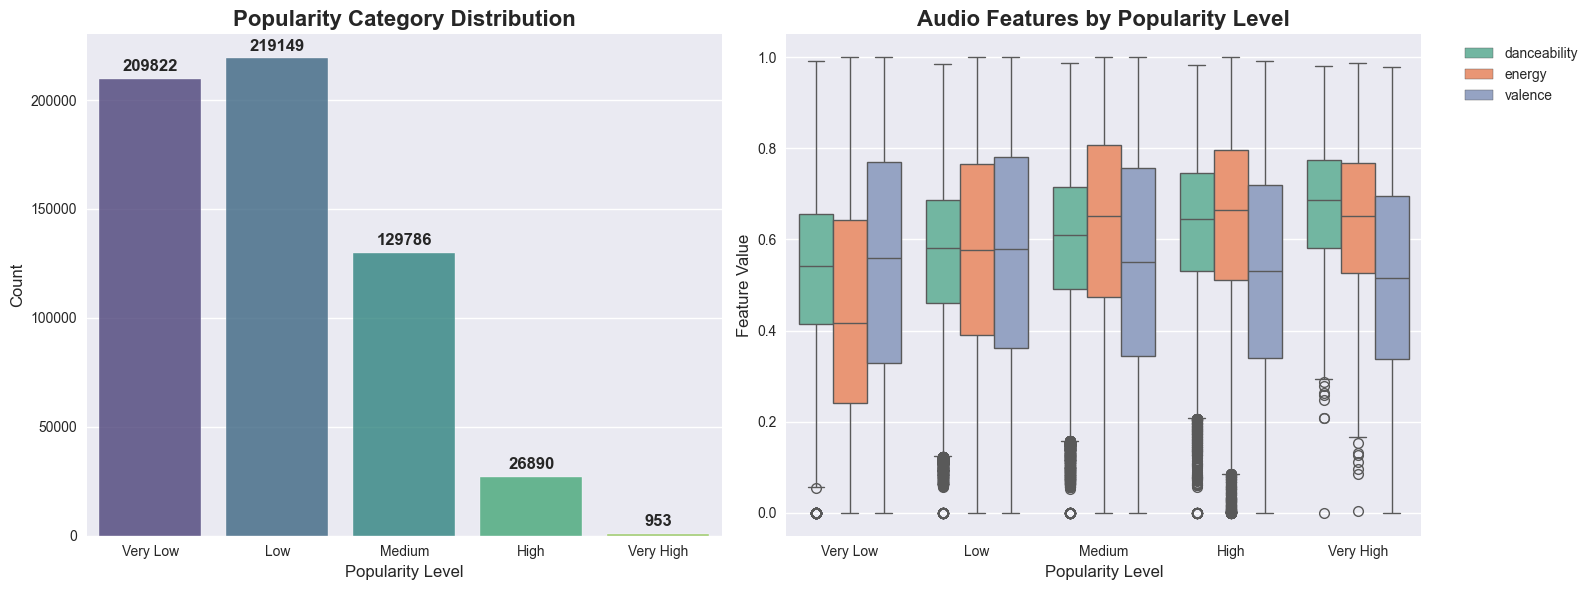

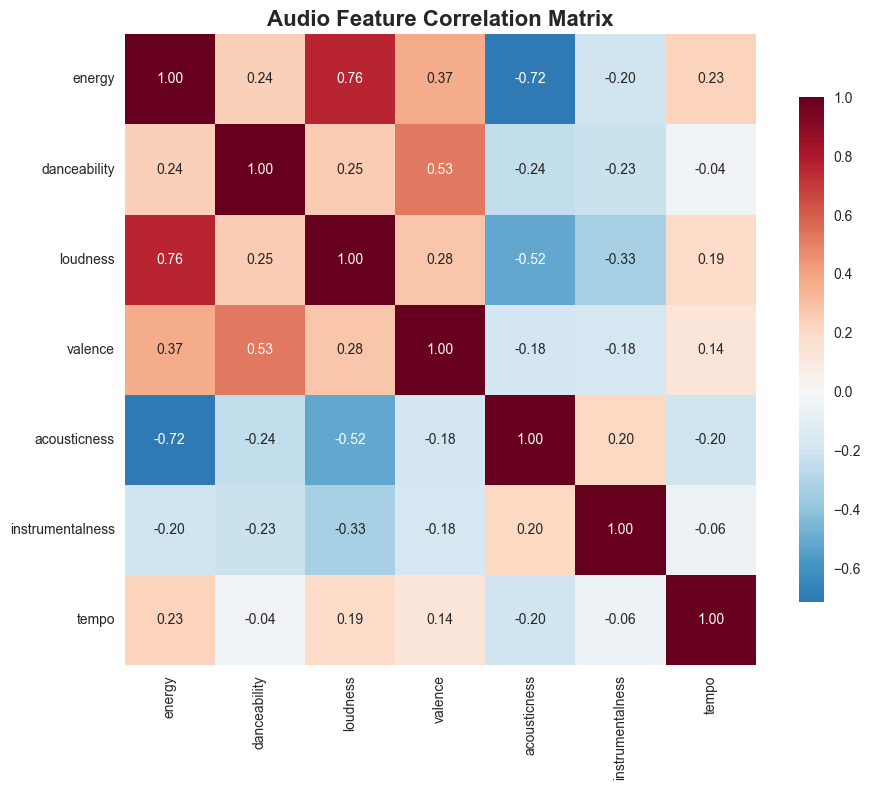

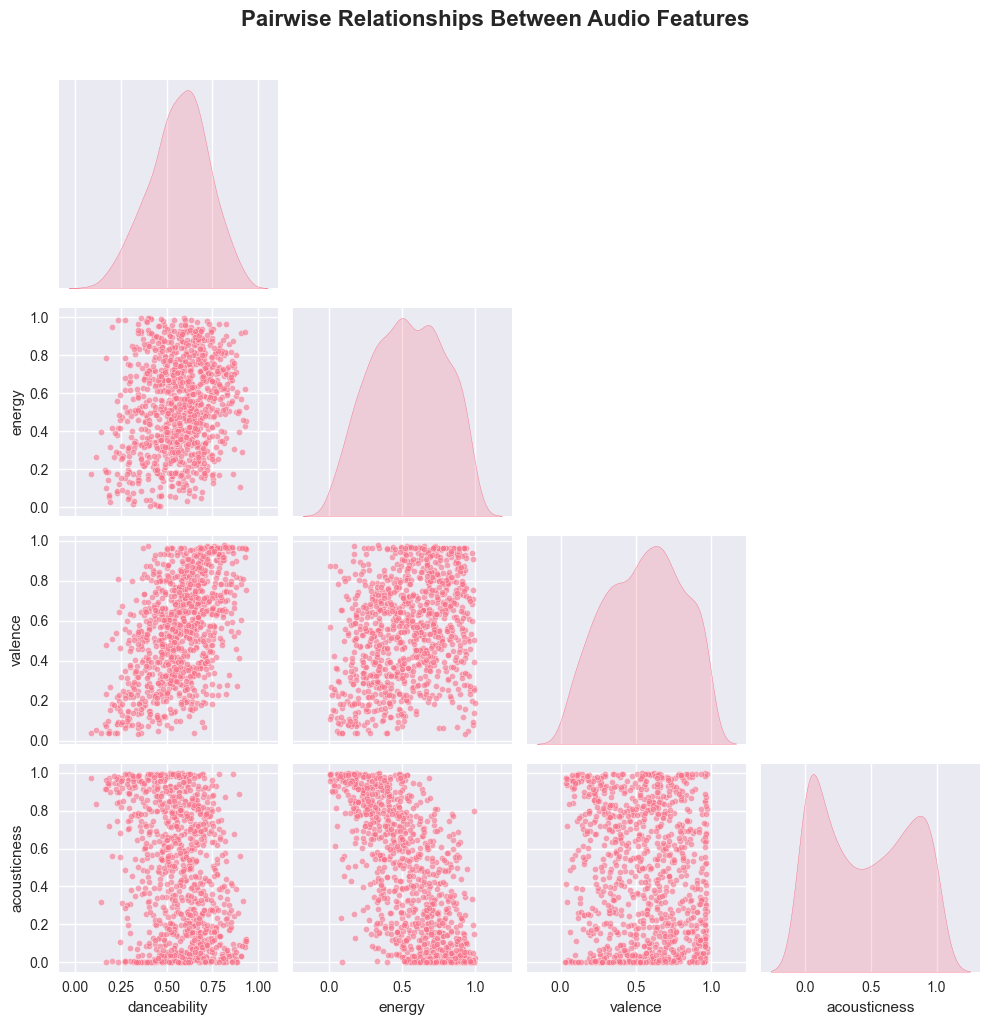

In [46]:
def plot_feature_distributions(df):
    """
    Task: Create distribution visualizations:
    1. Multiple feature distributions
    2. Popularity distribution by category
    3. Audio feature relationships
    """

    plt.style.use('seaborn-v0_8')
    sns.set_palette("husl")

    # 1. Multiple feature distributions
    features = ['duration_min', 'popularity', 'energy', 'danceability']

    fig1, axes1 = plt.subplots(2, 2, figsize=(14, 10))
    axes1 = axes1.flatten()

    for i, feature in enumerate(features):
        sns.histplot(data=df, x=feature, kde=True, ax=axes1[i],
                    alpha=0.7, edgecolor='white', linewidth=0.5)

        mean_val = df[feature].mean()
        median_val = df[feature].median()

        axes1[i].axvline(mean_val, color='red', linestyle='--', linewidth=2,
                        label=f'Mean: {mean_val:.2f}')
        axes1[i].axvline(median_val, color='green', linestyle='--', linewidth=2,
                        label=f'Median: {median_val:.2f}')

        axes1[i].set_title(f'{feature.replace("_", " ").title()} Distribution',
                          fontsize=14, fontweight='bold')
        axes1[i].set_xlabel(feature.replace('_', ' ').title(), fontsize=12)
        axes1[i].set_ylabel('Frequency', fontsize=12)
        axes1[i].legend(fontsize=10)
        axes1[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 2. Popularity distribution by category
    category_col = 'popularity_level'

    if category_col in df.columns:
        fig2, (ax2, ax3) = plt.subplots(1, 2, figsize=(16, 6))

        value_counts = df[category_col].value_counts().sort_index()

        bars = sns.barplot(x=value_counts.index.astype(str), y=value_counts.values,
                          ax=ax2, palette="viridis", alpha=0.8)


        for i, v in enumerate(value_counts.values):
            ax2.text(i, v + max(value_counts.values)*0.01, str(v),
                    ha='center', va='bottom', fontweight='bold', fontsize=12)

        ax2.set_title('Popularity Category Distribution', fontsize=16, fontweight='bold')
        ax2.set_xlabel('Popularity Level', fontsize=12)
        ax2.set_ylabel('Count', fontsize=12)

        audio_features_for_boxplot = ['danceability', 'energy', 'valence']

        melted_df = df.melt(id_vars=[category_col],
                           value_vars=audio_features_for_boxplot,
                           var_name='feature', value_name='value')

        sns.boxplot(data=melted_df, x=category_col, y='value', hue='feature',
                   ax=ax3, palette="Set2")
        ax3.set_title('Audio Features by Popularity Level', fontsize=16, fontweight='bold')
        ax3.set_xlabel('Popularity Level', fontsize=12)
        ax3.set_ylabel('Feature Value', fontsize=12)
        ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

        plt.tight_layout()
        plt.show()

    # 3. Audio feature relationships
    audio_features = ['energy', 'danceability', 'loudness', 'valence',
                     'acousticness', 'instrumentalness', 'tempo']

    # correlation
    corr_matrix = df[audio_features].corr()

    # subplot heatmap
    fig3, ax3 = plt.subplots(figsize=(10, 8))

    # mask
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r',
                center=0, ax=ax3, square=True,
                fmt='.2f', cbar_kws={'shrink': 0.8})

    ax3.set_title('Audio Feature Correlation Matrix', fontsize=16, fontweight='bold')

    plt.tight_layout()
    plt.show()

    scatter_features = ['danceability', 'energy', 'valence', 'acousticness']

    if len(df) > 1000:
        plot_data = df[scatter_features].sample(1000)
    else:
        plot_data = df[scatter_features]

    fig4 = sns.pairplot(plot_data, diag_kind='kde', corner=True,
                       plot_kws={'alpha': 0.6, 's': 20})
    fig4.fig.suptitle('Pairwise Relationships Between Audio Features',
                     fontsize=16, fontweight='bold', y=1.02)

    plt.tight_layout()
    plt.show()

plot_feature_distributions(cleaned_tracks)

## Task7: Create correlation visualizations
- Feature correlation heatmap
- Specific feature relationships

## 任务7：创建相关性可视化
- 特征相关性热图
- 特定特征关系

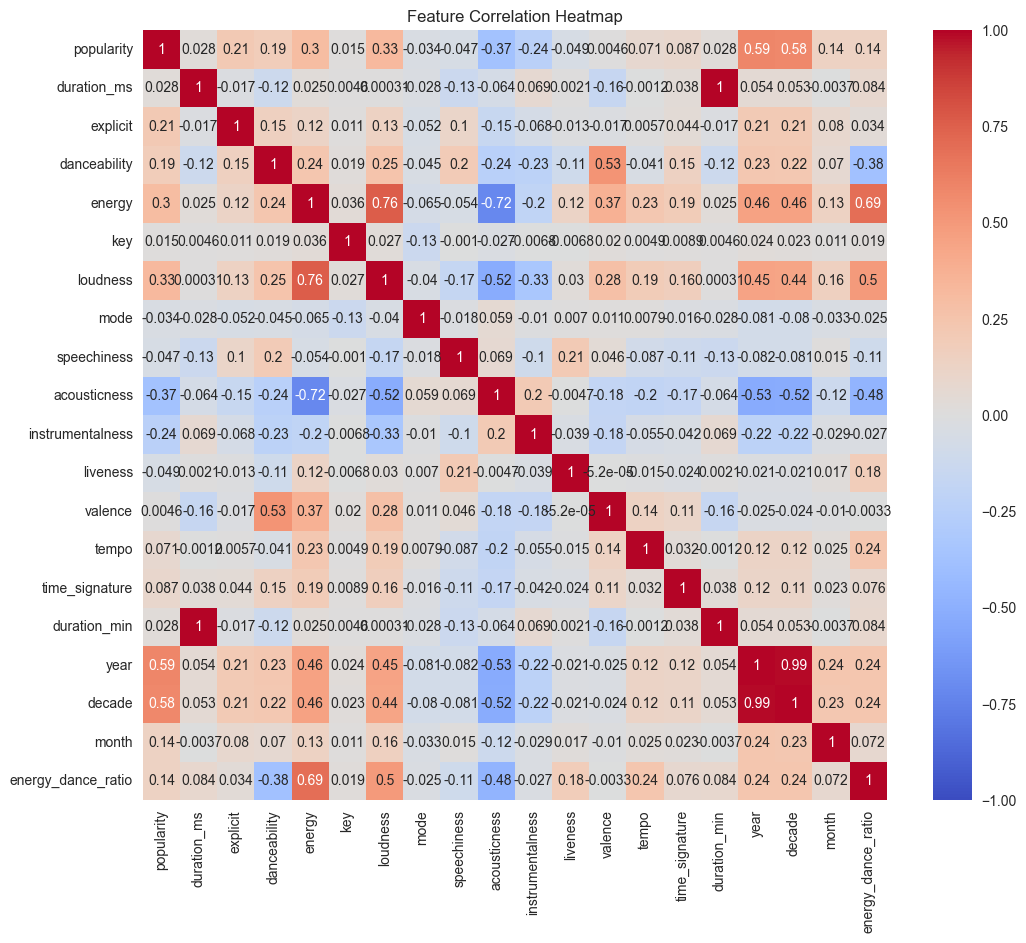

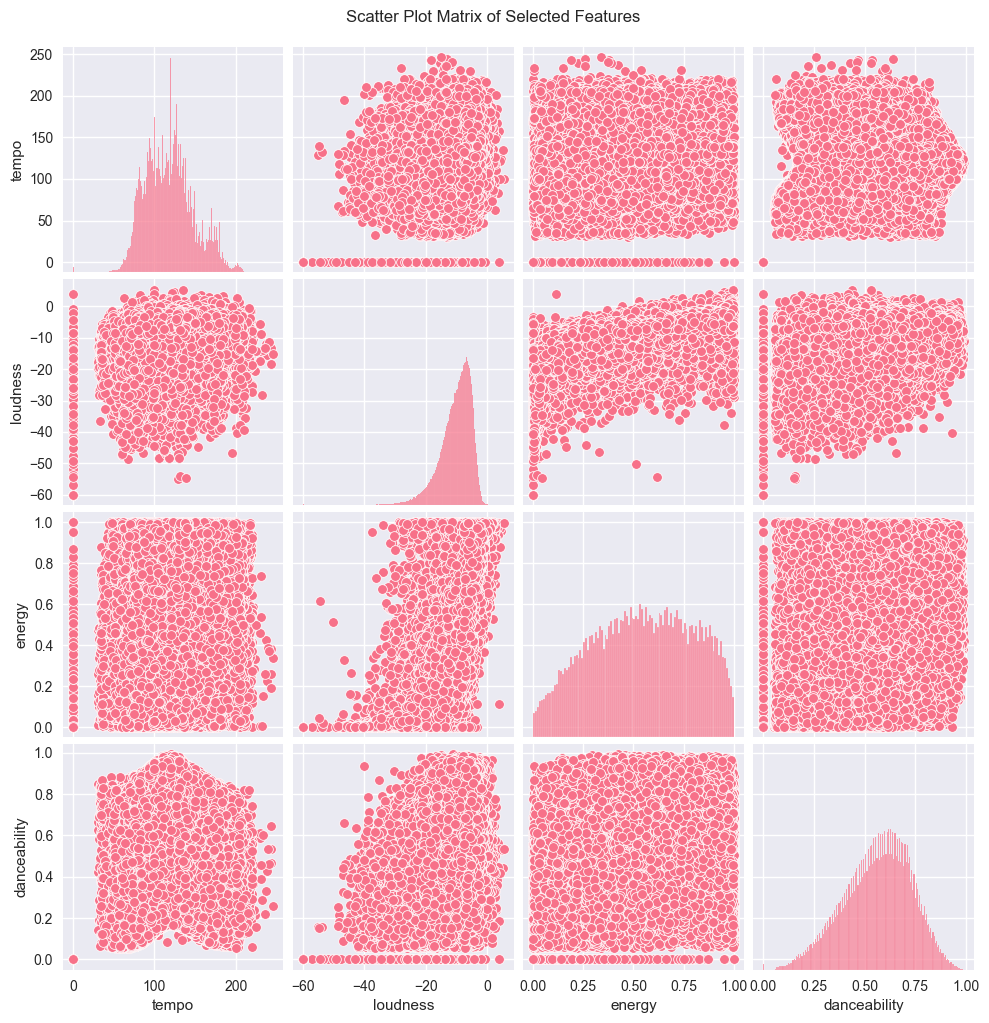

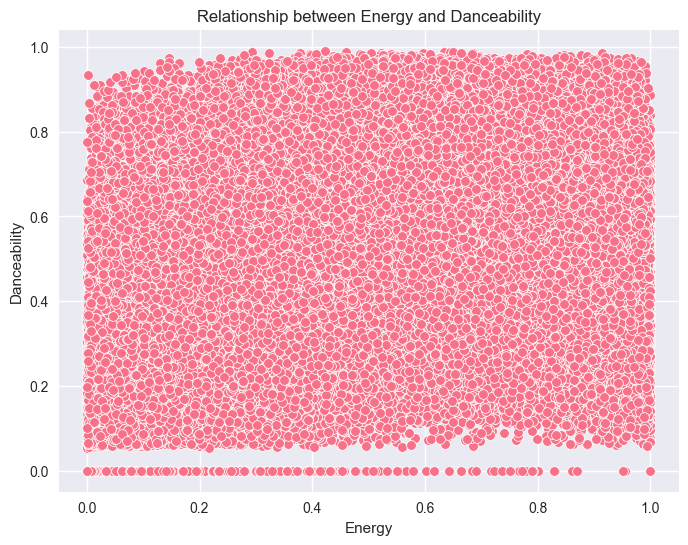

<Figure size 800x550 with 0 Axes>

In [48]:
def plot_correlation_analysis(df):
    """
    Task: Create correlation visualizations:
    1. Feature correlation heatmap
    2. Scatter plot matrix
    3. Specific feature relationships
    """
    numerical_df = df.select_dtypes(include=['number'])

    # 1. Feature correlation heatmap
    corr_matrix = numerical_df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Feature Correlation Heatmap')
    plt.show()

    # 2. Scatter plot matrix
    selected_features = ['tempo', 'loudness', 'energy', 'danceability']
    valid_features = [feature for feature in selected_features if feature in numerical_df.columns]
    if valid_features:
        sns.pairplot(numerical_df[valid_features])
        plt.suptitle('Scatter Plot Matrix of Selected Features', y=1.02)
        plt.show()

    if 'energy' in numerical_df.columns and 'danceability' in numerical_df.columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x='energy', y='danceability', data=numerical_df)
        plt.title('Relationship between Energy and Danceability')
        plt.xlabel('Energy')
        plt.ylabel('Danceability')
        plt.show()
    return plt.gcf()

corr_fig = plot_correlation_analysis(cleaned_tracks)

## Task8: Visualize genre evolution over time showing popularity and track count
### 1. Data Processing:
- Filter artists by genre
- Calculate yearly popularity
- Normalize values between 0-1
### 2. Polygon Creation:
- Points need to form a closed shape
- Include base points
- Use proper ordering
### 3. Key Concepts:
- Genre stacking (base_y)
- Time progression (x-axis)
- Popularity representation (height)

## 任务8：可视化流派随时间演变的趋势，展示其受欢迎程度和歌曲数量
### 1. 数据处理：
- 按流派筛选艺术家
- 计算年度受欢迎程度
- 将数值归一化到 0-1 之间

### 2. 多边形创建：
- 点需构成闭合图形
- 包含基点
- 使用正确的点序

### 3. 关键概念：
- 流派堆叠（基线_y轴）
- 时间进程（x轴）
- 受欢迎程度表示（高度）

['dance pop', 'pop', 'rock', 'electro house', 'classical performance']
genre_artists len: 572
numbers of tracks realted to current genre: 12119
genre_artists len: 568
numbers of tracks realted to current genre: 11908
genre_artists len: 564
numbers of tracks realted to current genre: 32026
genre_artists len: 559
numbers of tracks realted to current genre: 1994
genre_artists len: 502
numbers of tracks realted to current genre: 13808


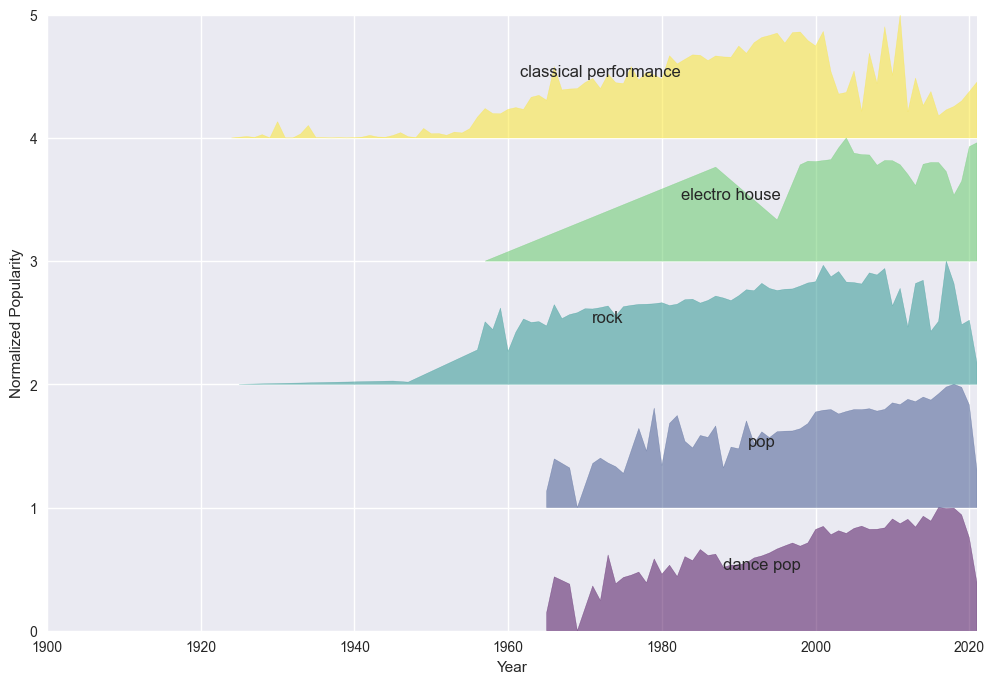

In [50]:
def is_genre_track(artist_ids, genre_artist_ids):
    return any(artist_id in genre_artist_ids for artist_id in artist_ids)

def visualize_genre_evolution(tracks_df, artists_df):
    # Convert genres and dates
    artists_df['genres_list'] = artists_df['genres'].apply(eval)
    artists_df = artists_df[artists_df['genres_list'].apply(lambda x: len(x) > 0)]
    tracks_df['year'] = pd.to_datetime(tracks_df['release_date'], format='mixed').dt.year
    # Create a dictionary to count genres
    genre_count = {}
    for genres in artists_df['genres_list']:
        for genre in genres:
            genre_count[genre] = genre_count.get(genre, 0) + 1

    # Get top 5 genres
    top_genres = sorted(genre_count, key=genre_count.get, reverse=True)[:5]

    print(top_genres)
    # Create plot
    fig, ax = plt.subplots(figsize=(12, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_genres)))

    # Initialize scaler for normalization
    scaler = MinMaxScaler()
    base_y = 0
    for idx, genre in enumerate(top_genres):

        genre_artists = artists_df[artists_df['genres_list'].apply(lambda x: genre in x)]
        print("genre_artists len:",len(genre_artists))

        tracks_df['id_artists_list'] = tracks_df['id_artists'].apply(eval)
        # (gentre, atristids) x (atristid, track_id)-> (gentre, track_id)
        genre_tracks = tracks_df[
            tracks_df['id_artists_list'].apply(
                lambda x: is_genre_track(x, genre_artists['id'].values)
            )
        ]
        print("numbers of tracks realted to current genre:", len(genre_tracks))
        genre_by_year = genre_tracks.groupby('year')['popularity'].mean().to_dict()

        # Skip if no data
        if not genre_by_year:
            print("This gentre relate to empty tracks, somthing went wrong!")
            continue

        # Normalize values between 0-1
        years = list(genre_by_year.keys())
        popularity = np.array(list(genre_by_year.values())).reshape(-1, 1)
        normalized_popularity = scaler.fit_transform(popularity).flatten()

        # Create polygon points
        points = list(zip(years, normalized_popularity + base_y))
        points = [(years[0], base_y)] + points + [(years[-1], base_y)]

        # Add polygon to plot
        polygon = plt.Polygon(points, color=colors[idx], alpha=0.5)
        ax.add_patch(polygon)

        # Add label
        mid_year = (years[0] + years[-1]) // 2
        ax.text(mid_year, base_y + 0.5, genre, fontsize=12, ha='center')

        base_y += 1

    # Set plot properties
    ax.set_xlim(min(tracks_df['year']), max(tracks_df['year']))
    ax.set_ylim(0, len(top_genres))
    plt.xlabel('Year')
    plt.ylabel('Normalized Popularity')
    return fig

# Create visualization
genre_fig = visualize_genre_evolution(tracks_df, artists_df)
plt.show()